In [53]:
import re
import subprocess
import time
import matplotlib.pyplot as plt

def run_stress_ng(method, worker_num):
    command = f"stress-ng --cpu {worker_num} --cpu-method {method} --timeout 10s --metrics-brief"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()
    if error:
        return parse_stress_ng_output(error.decode())

    return parse_stress_ng_output(output.decode())

def parse_stress_ng_output(output):
    print(output)
    pattern = re.compile(r'cpu\s+(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')
    match = pattern.search(output)

    print(match)

    if match:
        bogo_ops_value = float(match.group(1))
        return bogo_ops_value
    
    return None

def bogo_ops_graph(method, max_workers):
    worker_nums = []
    bogo_ops = []

    for worker_num in range(1, max_workers + 1):
        bogo_ops_value = run_stress_ng(method, worker_num)

        if bogo_ops_value is not None:
            worker_nums.append(worker_num)
            bogo_ops.append(bogo_ops_value)

        time.sleep(5) 

    plt.plot(worker_nums, bogo_ops, marker='o')
    plt.xlabel('Number of Workers')
    plt.ylabel('Bogo Ops')
    plt.title(f'Bogo Ops vs. Number of Workers (Method: {method})')
    plt.grid(True)
    plt.show()

stress-ng: info:  [5288] setting to a 10 second run per stressor
stress-ng: info:  [5288] dispatching hogs: 1 cpu
stress-ng: info:  [5288] successful run completed in 10.00s
stress-ng: info:  [5288] stressor       bogo ops real time  usr time  sys time   bogo ops/s     bogo ops/s
stress-ng: info:  [5288]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [5288] cpu               22540     10.00      9.83      0.06      2253.98        2279.07

<re.Match object; span=(413, 494), match='cpu               22540     10.00      9.83      >
stress-ng: info:  [5293] setting to a 10 second run per stressor
stress-ng: info:  [5293] dispatching hogs: 2 cpu
stress-ng: info:  [5293] successful run completed in 10.00s
stress-ng: info:  [5293] stressor       bogo ops real time  usr time  sys time   bogo ops/s     bogo ops/s
stress-ng: info:  [5293]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [5293

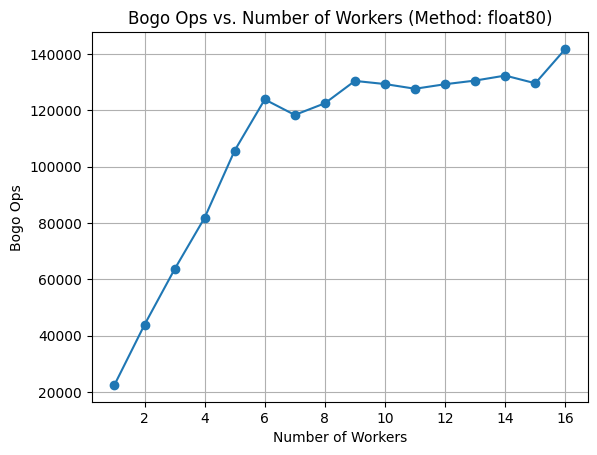

In [54]:
bogo_ops_graph("float80", 16)